In [ ]:
%pip install matplotlib

In [5]:
# Import Relevant libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

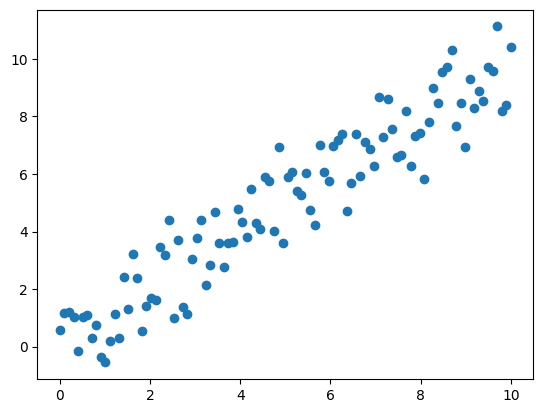

In [6]:
# Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

# the training dataset
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)

# plot of data
plt.scatter(x_train, y_train)

In [7]:
y_train

array([ 0.59230035,  1.16383912,  1.21395769,  1.02116748, -0.16856045,
        1.02589046,  1.08737279,  0.30708354,  0.74178142, -0.35552449,
       -0.55127795,  0.18025841,  1.11766123,  0.28670481,  2.43662598,
        1.31999849,  3.23559441,  2.37961799,  0.5286695 ,  1.4211436 ,
        1.70167514,  1.62427847,  3.4588234 ,  3.19692136,  4.41266249,
        1.00177654,  3.69829842,  1.38770852,  1.1509547 ,  3.04855106,
        3.77089709,  4.40512502,  2.12461514,  2.82642228,  4.6911602 ,
        3.61717632,  2.75066895,  3.59815414,  3.6274926 ,  4.77139501,
        4.32730335,  3.79370315,  5.48393199,  4.28736461,  4.07843819,
        5.88348607,  5.76633304,  4.01122553,  6.92460672,  3.59937043,
        5.897435  ,  6.05590579,  5.4241045 ,  5.25423161,  6.02995771,
        4.74072582,  4.22672404,  6.99579297,  6.08118994,  5.74930733,
        6.9603183 ,  7.1697934 ,  7.38228043,  4.70127255,  5.69024161,
        7.39477319,  5.9433934 ,  7.10747167,  6.87615332,  6.29

In [8]:
# declare weights
a = tf.Variable(0.)
b = tf.Variable(0.)

In [9]:
a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [10]:
# Define linear regression expression y
def linreg(x):
    y = a*x + b
    return y

In [11]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [12]:
# train model
for epoch in range(training_epochs):
    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

        # Get gradients
        gradients = tape.gradient(loss, [a,b])

        # Adjust weights
        a.assign_sub(gradients[0]*learning_rate)
        b.assign_sub(gradients[1]*learning_rate)

        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

Epoch count 0: Loss value: 33.930755615234375
Epoch count 1: Loss value: 4.238881587982178
Epoch count 2: Loss value: 1.2940051555633545
Epoch count 3: Loss value: 1.0019248723983765
Epoch count 4: Loss value: 0.9729516506195068
Epoch count 5: Loss value: 0.9700741767883301
Epoch count 6: Loss value: 0.9697846174240112
Epoch count 7: Loss value: 0.9697520732879639
Epoch count 8: Loss value: 0.9697447419166565
Epoch count 9: Loss value: 0.9697401523590088
Epoch count 10: Loss value: 0.9697358012199402
Epoch count 11: Loss value: 0.9697315692901611
Epoch count 12: Loss value: 0.9697272777557373
Epoch count 13: Loss value: 0.9697230458259583
Epoch count 14: Loss value: 0.9697189331054688
Epoch count 15: Loss value: 0.969714879989624
Epoch count 16: Loss value: 0.9697108268737793
Epoch count 17: Loss value: 0.9697068929672241
Epoch count 18: Loss value: 0.9697027802467346
Epoch count 19: Loss value: 0.9696987867355347
Epoch count 20: Loss value: 0.969694972038269
Epoch count 21: Loss value

In [13]:
print(a.numpy())
print(b.numpy())


0.9674956
0.16282827


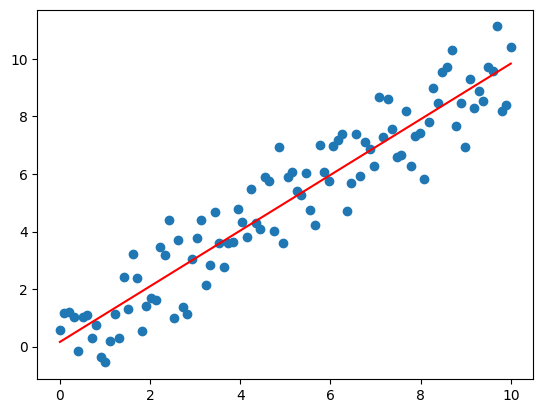

In [14]:
# Plot the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()